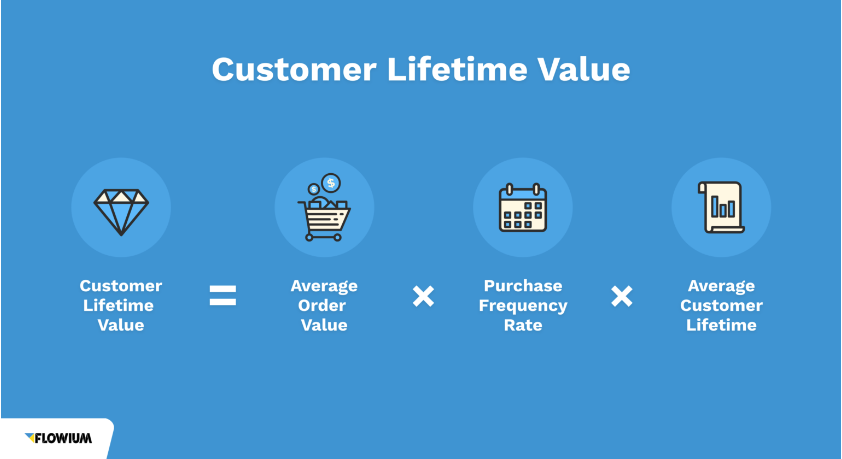

# <span style="font-family:cursive;">WHAT ARE THE CRM ANALYTICS ? </span>
 CRM analytics (Customer Relationship Management analytics) are a set of tools and techniques used to analyze customer data collected through CRM systems. CRM analytics is a type of business analytics that focuses on customer data, allowing businesses to gain insights into customer behavior, preferences, and needs. This information can then be used to improve customer satisfaction, increase customer loyalty, and ultimately increase revenue.

Some examples of CRM analytics include:

**Customer Segmentation**: Dividing customers into groups based on similar characteristics, such as demographics, buying patterns, or interests. This can help businesses tailor their marketing efforts to each group's unique needs and preferences.

**Customer Lifetime Value (CLV)**: Estimating the total amount of revenue a customer is likely to generate over the course of their relationship with a business. This can help businesses identify their most valuable customers and allocate resources accordingly.

**Churn Analysis**: Analyzing customer behavior to identify factors that contribute to customer churn (i.e., when a customer stops doing business with a company). This information can be used to develop retention strategies to keep customers loyal.

**Cross-Selling and Upselling Analysis**: Analyzing customer data to identify opportunities to sell additional products or services to existing customers. This can increase revenue and customer satisfaction.

**Sales Forecasting**: Predicting future sales based on historical data and current trends. This can help businesses make informed decisions about staffing, inventory, and other resources.

Overall, CRM analytics provides businesses with valuable insights into their customer base, enabling them to make data-driven decisions that improve customer satisfaction and drive business growth.


## <span style="font-family:cursive;">About The Project Process</span>
 I am going to realize Customer LifeTime Value Prediction(CLTV) in CRM Analytics for this project.</br>
 Firstly, I want to describe what **CLTV** is. CLTV prediction is a method used to estimate the total value that a customer will bring to a business over the course of their relationship. It is a critical metric for businesses that want to understand the long-term value of their customers and make data-driven decisions on how to allocate resources to acquire and retain customers. </br>
 I will use two seperate models when evaluating CLTV.
1. BB/NGD(Beta Geometric/Negative Binomial Distribution)
    * In this model, our aim is to model the purchasing behavior of our general population and personalize it through probability distributions
    * This model is also known as **Buy(Transaction Process) Till You Die(Dropout Process)**
2. GAMMA GAMMA SubModel
    * It is used to estimate how much profit a customer can make on average per transaction.


# Description of the Dataset
Data set includes OmniChannel (both online and offline shoppers) who made their last purchases in 2020 - 2021
information obtained from the past shopping behaviors of customers who shop as a customer.

# Variables
 * **master_id**                       : Unique Customer Number
 * **order_channel**                    : Which platform customer uses(Android, Ios, Desktop, Mobile, Offline)
 * **last_order_channel**                : The platform where the last purchase was made
 * **first_order_date**                 : Date of the customer's first purchase
 * **last_order_date**                   : Date of the customer's last purchase
 * **last_order_date_online**            : The date of the customer's last purchase on the online platform
 * **last_order_date_offline**           : The date of the customer's last purchase on the offline platform
 * **order_num_total_ever_online**       : Total number of online purchases made by the customer
 * **order_num_total_ever_offline**      : Total number of offline purchases made by the customer
 * **customer_value_total_ever_offline** : Total price paid by the customer for offline purchases
 * **customer_value_total_ever_online**  : Total price paid by the customer for online purchases
 * **interested_in_categories_12**       : List of categories in which the customer shopped in the last 12 months
 

In [1]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00


In [2]:
# Libraries
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Creating Data Set


import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_ = pd.read_csv("/kaggle/input/flo-data-20k/flo_data_20k.csv")
df = df_.copy()
df.head()


/kaggle/input/flo-data-20k/flo_data_20k.csv


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR]


In [4]:
# Check Data Set
def datacheck(dataframe):
    
    print(dataframe.head(10))
    print("******Shape******")
    print(dataframe.shape)
    print("******Info********")
    print(dataframe.info())
    print("******Describe********")
    print(dataframe.describe().T)
    print("***** NAN Values********")
    print(dataframe.isnull().sum())

datacheck(df)

                              master_id order_channel last_order_channel first_order_date last_order_date last_order_date_online last_order_date_offline  order_num_total_ever_online  order_num_total_ever_offline  customer_value_total_ever_offline  customer_value_total_ever_online       interested_in_categories_12
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline       2020-10-30      2021-02-26             2021-02-21              2021-02-26                       4.0000                        1.0000                           139.9900                          799.3800                           [KADIN]
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile       2017-02-08      2021-02-16             2021-02-16              2020-01-10                      19.0000                        2.0000                           159.9700                         1853.5800  [ERKEK, COCUK, KADIN, AKTIFSPOR]
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App  

In [5]:
# Suppressing contradictory values
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = round(low_limit) 
    dataframe.loc[(dataframe[variable] > up_limit), variable] = round(up_limit)
    
# Alternative method for "replace_with_threholds"
 #dataframe[variable] = dataframe[variable].apply(
        #lambda x: round(up_limit) if x > up_limit else (round(low_limit) if x < low_limit else x))


In [6]:
# suppress variables that contain "total"
for col in df.columns[df.columns.str.contains("total")]:
    replace_with_thresholds(df, col)
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [7]:
# Omnichannel means that customers shop both online and offline.
# Create new variables for each customer's total number of purchases and spend.

df["total_order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]  # Total products purchased
df["total_spending"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]  # Total Spending
df.head()


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_spending
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN],5.0000,939.3700
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0000,2013.5500
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]",5.0000,585.3200
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]",2.0000,121.9700
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR],2.0000,209.9800


In [8]:
# Examine variable types. Change the type of variables that express date to convert them to date.

dates = ["first_order_date", "last_order_date", "last_order_date_online", "last_order_date_offline"]
df[dates] =df[dates].apply(pd.to_datetime)
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_order                                 float64
total_spending                              float64
dtype: object

In [9]:
# Take 2 days after the date of the last purchase in the dataset as the analysis date

today_date = df["last_order_date"].max() + dt.timedelta(days=2)

In [10]:
# Create a new cltv dataframe that includes customer_id, recency_cltv_weekly, T_weekly, frequency and monetary_cltv_avg
cltv_df = pd.DataFrame()

cltv_df['customer_id'] = df['master_id']
cltv_df['recency_cltv_weekly'] = (df["last_order_date"] - df["first_order_date"]).dt.days / 7
cltv_df['T_weekly'] = (today_date - df["first_order_date"]).dt.days / 7
cltv_df['frequency'] = df['total_order']
cltv_df['monetary_cltv_avg'] = df['total_spending'] / df['total_order']
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.0000,30.5714,5.0000,187.8740
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.8571,224.8571,21.0000,95.8833
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.2857,78.8571,5.0000,117.0640
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.5714,20.8571,2.0000,60.9850
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.1429,95.4286,2.0000,104.9900


In [11]:
# Setting of BG/NBD Model

bgf = BetaGeoFitter(penalizer_coef=0.01)

# The BG-NBD model is fitted on the frequency, recency and tenure.

bgf.fit(cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['T_weekly'])

# Add new variables in cltv_df ("exp_sales_3_month", exp_sales_6_month)
cltv_df["exp_sales_3_month"] = bgf.predict(12,
                                        cltv_df['frequency'],
                                        cltv_df['recency_cltv_weekly'],
                                        cltv_df['T_weekly'])
cltv_df["exp_sales_6_month"] = bgf.predict(24,
                                        cltv_df['frequency'],
                                        cltv_df['recency_cltv_weekly'],
                                        cltv_df['T_weekly'])
cltv_df.head()




,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.0000,30.5714,5.0000,187.8740,1.1169,2.2338
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.8571,224.8571,21.0000,95.8833,1.0256,2.0512
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.2857,78.8571,5.0000,117.0640,0.6947,1.3894
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.5714,20.8571,2.0000,60.9850,0.7562,1.5125
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.1429,95.4286,2.0000,104.9900,0.3654,0.7309


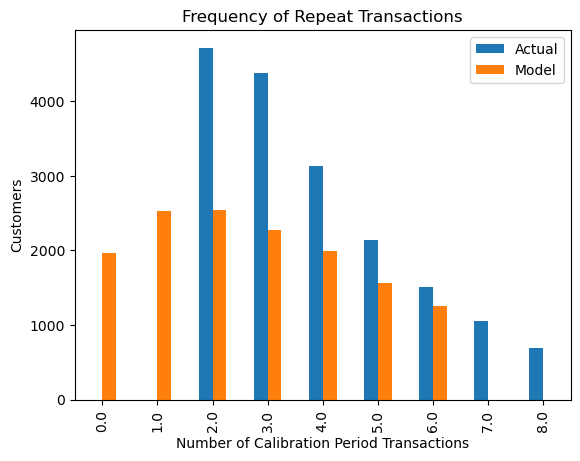

In [12]:
# The Graph of The Transaction(BG/NBD Model)

plot_period_transactions(bgf)
plt.show()


In [13]:
# Setting of Gamma-Gamma Model 

ggf = GammaGammaFitter(penalizer_coef=0.01)

# The Gamma-Gamma model is fitted on the frequency and monetary_cltv-avg

ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])

# Estimate the average value that customers will spend
# Add it to the cltv dataframe as "exp_average_value".

cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])

# Calculate 6 months CLTV value and add it to the dataframe as "cltv".

cltv_df['cltv'] = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['T_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time=6,  # 6 months
                                   freq="W",  # T's frequency information.
                                   discount_rate=0.01)

# Let's sort by cltv value and look at the top 20 values

cltv_df.sort_values("cltv", ascending=False).head(20)


,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,6.1429,13.1429,11.0000,758.0855,2.5918,5.1835,767.3606,4173.4061
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.8571,7.8571,4.0000,1401.8000,1.3526,2.7051,1449.0605,4112.8517
6666,53fe00d4-7b7a-11eb-960b-000d3a38a36f,9.7143,13.0000,17.0000,259.8653,3.7614,7.5228,262.0729,2068.5579
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.7143,67.2857,52.0000,166.2246,5.6193,11.2385,166.7123,1965.8220
8868,9ce6e520-89b0-11ea-a6e7-000d3a38a36f,3.4286,34.4286,8.0000,601.2262,1.4973,2.9947,611.4926,1921.3683
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,74.2857,74.5714,16.0000,501.8737,1.7881,3.5762,506.1667,1899.2521
19538,55d54d9e-8ac7-11ea-8ec0-000d3a38a36f,52.5714,58.7143,31.0000,228.5300,3.7247,7.4494,229.6069,1794.6168
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,51.7143,101.0000,7.0000,1106.4671,0.7522,1.5044,1127.6115,1779.8418
6402,851de3b4-8f0c-11eb-8cb8-000d3a38a36f,8.2857,9.4286,2.0000,862.6900,0.9045,1.8089,923.6800,1753.1232
10876,ae149d98-9b6a-11eb-9c47-000d3a38a36f,6.1429,7.1429,9.0000,317.4844,2.4409,4.8818,322.5116,1651.9449


In [14]:
# Creation of Segments according to CLTV Value

cltv_df["segment"] = pd.qcut(cltv_df["cltv"], 4, labels=["D", "C", "B", "A"])
cltv_df.head(25)

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.0000,30.5714,5.0000,187.8740,1.1169,2.2338,193.6327,453.8281,A
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.8571,224.8571,21.0000,95.8833,1.0256,2.0512,96.6650,208.0348,B
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.2857,78.8571,5.0000,117.0640,0.6947,1.3894,120.9676,176.3415,B
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.5714,20.8571,2.0000,60.9850,0.7562,1.5125,67.3201,106.8310,D
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.1429,95.4286,2.0000,104.9900,0.3654,0.7309,114.3251,87.6693,D
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,120.8571,132.2857,3.0000,66.9533,0.3573,0.7147,71.3481,53.4988,D
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,32.5714,64.8571,4.0000,93.9825,0.6747,1.3494,98.1334,138.9365,C
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,12.7143,54.5714,2.0000,81.8150,0.5098,1.0195,89.5702,95.8146,D
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,58.4286,70.7143,5.0000,210.9380,0.7420,1.4840,217.3009,338.3413,A
9,1143f032-440d-11ea-8b43-000d3a38a36f,61.7143,96.0000,2.0000,82.9800,0.3640,0.7280,90.8146,69.3658,D


In [15]:
cltv_df.groupby("segment").agg({"count","mean","sum"})

recency_cltv_weekly                      T_weekly                      frequency                   monetary_cltv_avg                       exp_sales_3_month                  exp_sales_6_month                  exp_average_value                        cltv                      
                      count         sum     mean    count         sum     mean     count        sum   mean             count          sum     mean             count       sum   mean             count       sum   mean             count          sum     mean count          sum     mean
segment                                                                                                                                                                                                                                                                                     
D                      4987 702266.0000 140.8193     4987 818570.1429 164.1408      4987 18414.0000 3.6924              4987  476745.8484  95.5977              4987 1898.1009 0.3806              4987 3796.2017 0.7612              4987  505529.5018 101.3695  4987  379447.0480  76.0872
C                      4986 461529.7143  92.5651     4986 562662.5714 112.8485      4986 21553.0000 4.3227              4986  637420.1821 127.8420              4986 2557.5498 0.5129              4986 5115.0996 1.0259              4986  670462.7632 134.4691  4986  677489.9204 135.8784
B                      4986 404759.5714  81.1792     4986 496900.2857  99.6591      4986 25468.0000 5.1079              4986  801959.0658 160.8422              4986 3052.9040 0.6123              4986 6105.8080 1.2246              4986  838668.9679 168.2048  4986 1001942.6220 200.9512
A                      4986 331475.1429  66.4812     4986 405007.7143  81.2290      4986 33854.0000 6.7898              4986 1117489.6301 224.1255              4986 4215.8384 0.8455              4986 8431.6767 1.6911              4986 1161351.1818 232.9224  4986 1917308.0118 384.5383

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Thank you for supports and comments.✌️✌🏿
    </br>
You can follow me: </br>
linkedin: <a href="https://www.linkedin.com/in/yunus-emre-turkoglu-89804b193/" target="_blank"><font color=white>Visit My Profile</font></a>

</p>
</div>
